# Correlation

Given a pair of random variables ${\displaystyle (X,Y)}$, the formula for linear correlation coefficient $\rho$ is:

$$
{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}} = {\frac {\operatorname {E}[(X - \mu_x)(Y - \mu_y)]}{\sigma _{X}\sigma _{Y}}}}
$$

- The numerator is *less than or equal* the denominator in absolute value by the [Cauchy Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality).
- **Subadditivity**: if we break up the data in e.g. quadrants $Q$, then $|Corr(Q)| \leq |\rho|$
- The $\beta$ of a regression is equal to the correlation when the variables are scaled (i.e. $x' = \frac{x - \bar{x}}{\sigma_x}$ and $y' = \frac{y - \bar{y}}{\sigma_y}$)
- Correlation of .25 is closer to 0 than to .5. Or, with correlation passing from 0.99 to 0.9, there is a big loss of information, more than the decreas in $\rho$ could suggest. The correlation measure can then be rescaled in order to account for this.

    1. **Conditional standard deviation** $V(X|Y) \in [0, 1]$ to accommodate distances between $E(X|Y)$ and $E(X)$.
    2. The more rigorous **mutual information**, unbounded, in $[0, \infty)$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

means = [0, 0]  
stds = [1, 1]
corr = 0.5
cov = stds[0]*stds[1]*corr

covs = [[stds[0]**2, cov], 
        [cov, stds[1]**2]] 

sample = np.random.multivariate_normal(means, covs, 10000).T

In [2]:
sample_df = pd.DataFrame(sample).T
sample_df.columns = ['x', 'y']

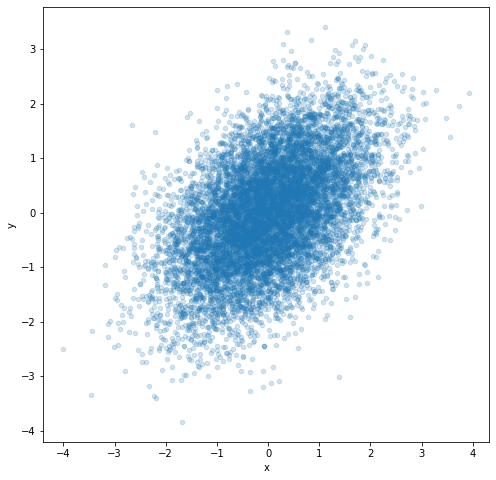

In [3]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

sample_df.plot(kind='scatter', x='x', y='y', alpha=0.2, ax=ax)
plt.show()

## <span style='font-family:Inter'> Sub-additivity </span>

In [4]:
# Quadrants correlation

q1_corr = sample_df[(sample_df.x < 0) & (sample_df.y > 0)].corr().iloc[1, 0]
q2_corr = sample_df[(sample_df.x > 0) & (sample_df.y > 0)].corr().iloc[1, 0]
q3_corr = sample_df[(sample_df.x > 0) & (sample_df.y < 0)].corr().iloc[1, 0]
q4_corr = sample_df[(sample_df.x < 0) & (sample_df.y < 0)].corr().iloc[1, 0]

print('Quadrant one correlation: ' + str(round(q1_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q2_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q3_corr, 3)) + ',\n' +
      'Quadrant one correlation: ' + str(round(q4_corr, 3)))

Quadrant one correlation: 0.148,
Quadrant one correlation: 0.253,
Quadrant one correlation: 0.171,
Quadrant one correlation: 0.258


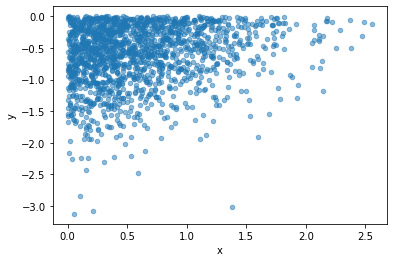

In [5]:
# Quadrants correlation
sample_df[(sample_df.x > 0) & (sample_df.y < 0)].plot(kind='scatter', x='x', y='y', alpha=0.5)
plt.show()

## <span style='font-family:Inter'> Account For Non-Linearity </span>

### <span style='font-family:Inter'> Mutual Information

The Mutual Information is a measure of the similarity between two labels of the same data. Where $|U_i|$ is the number of the samples in cluster and 
 is the number of the samples in cluster 
, the Mutual Information between clusterings  and  is given as:

$$
MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}
$$
 
 
 
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

This metric is furthermore symmetric: switching label_true with label_pred will return the same score value. This can be useful to measure the agreement of two independent label assignments strategies on the same dataset when the real ground truth is not known.

In [13]:
import warnings
from sklearn.metrics import mutual_info_score

warnings.filterwarnings('ignore')

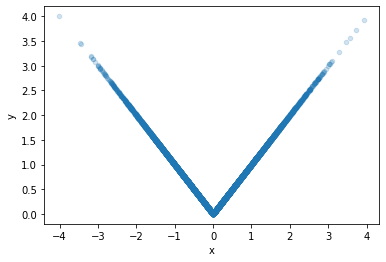

In [14]:
new_s = sample_df.x.apply(lambda x: -x if x < 0 else x)
new_sample_df = pd.concat([sample_df.loc[:, 'x'], new_s], axis=1)
new_sample_df.columns = ['x', 'y']
new_sample_df.plot(kind='scatter', x='x', y='y', alpha=0.2)
plt.show()

In [17]:
print('Mutual Information Coefficient', mutual_info_score(new_sample_df.loc[:, 'x'], new_sample_df.loc[:, 'y']))

Mutual Information Coefficient 9.21034037197618


### Conditional Standard Deviation
[...]

**Is the correlation between two time series changing if I subtract a third series from the two series? If yes, why?**

Subtracting a third time series from two time series will generally change the correlation between the original two time series. This is because correlation measures the degree of linear relationship between two variables, and subtracting a third series can affect the linear relationship between the original two series.

To understand why this is the case, consider the formula for correlation between two time series $X$ and $Y$:

$$\text{Correlation}(X,Y) = \frac{\text{cov}(X,Y)}{\text{std}(X) \cdot \text{std}(Y)}$$

where $\text{cov}(X,Y)$ is the covariance between $X$ and $Y$, and $\text{std}(X)$ and $\text{std}(Y)$ are the standard deviations of $X$ and $Y$, respectively.

Now suppose we subtract a third time series $Z$ from both $X$ and $Y$. The new time series will be $X-Z$ and $Y-Z$. Therefore, the new correlation between $X$ and $Y$ can be calculated as:
scss
Copy code
Correlation(X-Z, Y-Z) = cov(X-Z, Y-Z) / (std(X-Z) * std(Y-Z))
Expanding the covariance term, we have:

scss
Copy code
cov(X-Z, Y-Z) = cov(X,Y) - cov(X,Z) - cov(Y,Z) + cov(Z,Z)
Notice that the subtraction of Z from both X and Y does not affect the covariance between X and Y. However, the other terms in the equation will be affected by the subtraction of Z, and hence the resulting correlation between X and Y will be different from the original correlation.

In summary, subtracting a third time series from two time series can change their correlation because it can affect the covariance between the original two series.

And in hierarchical clustering?